In [697]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 100

warnings.filterwarnings('ignore')
%matplotlib inline

In [698]:
data = pd.read_csv('data/train.csv')

In [699]:
data.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [700]:
data.shape

(10000, 20)

In [701]:
data['Id'].nunique()

10000

In [702]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [703]:
data = data.drop('Healthcare_1', axis=1)

In [704]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(7), int64(9), object(3)
memory usage: 1.4+ MB


In [705]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [706]:
data.loc[data['HouseYear'] > 2020, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,5,8,B,243028.603096


In [707]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear']

1497    20052011
Name: HouseYear, dtype: int64

In [708]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2008

In [709]:
data.loc[data['HouseYear'] == 4968, 'HouseYear']

4189    4968
Name: HouseYear, dtype: int64

In [710]:
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968

In [711]:
data.loc[data['HouseYear'] < 1900, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price


In [712]:
data['HouseYear'].describe()

count    10000.00000
mean      1984.86600
std         18.41187
min       1910.00000
25%       1974.00000
50%       1977.00000
75%       2001.00000
max       2020.00000
Name: HouseYear, dtype: float64

In [713]:
data['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [714]:
data.loc[data['Rooms'] > 5, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,2,4,B,172329.270863


In [715]:
data.loc[data['Id'].isin([5927, 14003, 14865]), 'Rooms'] = 2

In [716]:
data.loc[data['Id'] == 8491, 'Rooms'] = 1

In [717]:
data.loc[data['Rooms'] < 1, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,0,1,B,219281.918007


In [718]:
data.loc[data['Square'] < 15, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261


In [719]:
Small_Square_Ids = data.loc[data['Square'] < 15, 'Id'].values
Small_Square_Ids

array([ 1748, 11526, 10202, 10527,  9487, 12676,  3224,  4504, 14786,
       13265, 15744,  6782,  7657])

In [720]:
data.loc[data['Id'].isin(Small_Square_Ids), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261


In [721]:
mean_square = data.groupby('Rooms', as_index=False)[['Square']].mean().rename(columns={'Square': 'mean_square'})
mean_square

,Rooms,mean_square
0,0.0,81.620358
1,1.0,41.323462
2,2.0,56.790526
3,3.0,76.903234
4,4.0,98.377544
5,5.0,122.614941


In [722]:
data = pd.merge(data, mean_square, on='Rooms', how='left')

In [723]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,0,11,B,184966.930730,56.790526
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,1,16,B,300009.450063,76.903234
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,1,3,B,220925.908524,56.790526
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,0,5,B,175616.227217,56.790526
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2,4,B,150226.531644,41.323462
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,0,6,B,215898.447742,76.903234
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,1,5,B,296021.204377,56.790526
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,0,2,B,221244.156664,56.790526
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,0,1,B,229102.795999,56.790526
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,0,2,B,95380.220993,41.323462


In [724]:
data.loc[data['Id'].isin(Small_Square_Ids), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764,56.790526
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441,41.323462
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458,41.323462
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383,41.323462
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061,41.323462
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186,76.903234
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798,81.620358
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034,76.903234
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589,41.323462
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261,76.903234


In [725]:
data.loc[data['Id'].isin(Small_Square_Ids), 'Square'] = data['mean_square']

In [726]:
data.loc[data['Id'].isin(Small_Square_Ids), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
212,1748,88,2.0,56.790526,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764,56.790526
1316,11526,27,1.0,41.323462,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441,41.323462
1608,10202,6,1.0,41.323462,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458,41.323462
3280,10527,27,1.0,41.323462,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383,41.323462
3413,9487,5,1.0,41.323462,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061,41.323462
4739,12676,81,3.0,76.903234,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186,76.903234
4853,3224,27,0.0,81.620358,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798,81.620358
4900,4504,27,3.0,76.903234,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034,76.903234
6392,14786,1,1.0,41.323462,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589,41.323462
8030,13265,1,3.0,76.903234,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261,76.903234


In [727]:
data.loc[data['Id'].isin(Small_Square_Ids), 'LifeSquare'] = data['Square']

In [728]:
data.loc[data['Id'].isin(Small_Square_Ids), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
212,1748,88,2.0,56.790526,56.790526,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,3,9,B,412511.088764,56.790526
1316,11526,27,1.0,41.323462,41.323462,1.0,18,1.0,1977,0.011654,B,B,4,915,0,0,0,B,107604.269441,41.323462
1608,10202,6,1.0,41.323462,41.323462,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,0,0,B,137597.601458,41.323462
3280,10527,27,1.0,41.323462,41.323462,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,0,1,B,97560.720383,41.323462
3413,9487,5,1.0,41.323462,41.323462,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,4,5,B,369472.403061,41.323462
4739,12676,81,3.0,76.903234,76.903234,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,5,8,B,78388.806186,76.903234
4853,3224,27,0.0,81.620358,81.620358,0.0,1,0.0,1977,0.017647,B,B,2,469,0,0,0,B,126596.941798,81.620358
4900,4504,27,3.0,76.903234,76.903234,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,0,1,B,161379.067034,76.903234
6392,14786,1,1.0,41.323462,41.323462,1.0,3,1.0,1977,0.007122,B,B,1,264,0,0,1,B,181434.825589,41.323462
8030,13265,1,3.0,76.903234,76.903234,0.0,6,17.0,1977,0.007122,B,B,1,264,0,0,1,B,237716.681261,76.903234


In [729]:
data.loc[data['Square'] > 150, 'Id'].shape

(26,)

In [730]:
data.loc[data['Square'] > 150, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979,76.903234
1641,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698,41.323462
1812,5602,93,3.0,169.385184,NaN,1.0,2,10.0,1977,0.004949,B,B,0,186,0,0,0,B,190949.293998,76.903234
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887,81.620358
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666,122.614941
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663,76.903234
2656,14556,183,4.0,151.150660,98.187482,23.0,6,7.0,1912,0.037316,B,B,32,6748,93,4,10,B,284884.959104,98.377544
3260,16204,23,1.0,160.647588,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,0,0,B,217874.997452,41.323462
3368,6674,54,1.0,168.086347,125.486563,30.0,18,28.0,2011,0.006076,B,B,30,5285,0,6,6,B,367353.574566,41.323462
3651,5300,30,3.0,169.509941,170.713651,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,3,23,B,200800.673767,76.903234


In [731]:
Big_Square_Ids = data.loc[data['Square'] > 150, 'Id'].values

In [732]:
Big_Square_Ids

array([ 3718, 11055,  5602,  7917,  5548,  5621, 14556, 16204,  6674,
        5300, 15362,    28, 13434,  2307, 15947, 14181, 10678,  3914,
       11602,  5376,  3233,  4991,  4249, 11764,  2603, 16568])

In [733]:
data.loc[data['Square'] > 150, :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
652,3718,56,3.0,190.857689,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979,76.903234
1641,11055,151,1.0,174.649522,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698,41.323462
1812,5602,93,3.0,169.385184,NaN,1.0,2,10.0,1977,0.004949,B,B,0,186,0,0,0,B,190949.293998,76.903234
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887,81.620358
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666,122.614941
2603,5621,23,3.0,163.495333,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663,76.903234
2656,14556,183,4.0,151.150660,98.187482,23.0,6,7.0,1912,0.037316,B,B,32,6748,93,4,10,B,284884.959104,98.377544
3260,16204,23,1.0,160.647588,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,0,0,B,217874.997452,41.323462
3368,6674,54,1.0,168.086347,125.486563,30.0,18,28.0,2011,0.006076,B,B,30,5285,0,6,6,B,367353.574566,41.323462
3651,5300,30,3.0,169.509941,170.713651,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,3,23,B,200800.673767,76.903234


In [734]:
data.loc[data['Id'].isin(Big_Square_Ids), 'Square'] = data['mean_square']

In [735]:
data.loc[data['Id'].isin(Big_Square_Ids), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
652,3718,56,3.0,76.903234,107.376164,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979,76.903234
1641,11055,151,1.0,41.323462,174.837082,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698,41.323462
1812,5602,93,3.0,76.903234,NaN,1.0,2,10.0,1977,0.004949,B,B,0,186,0,0,0,B,190949.293998,76.903234
1981,7917,27,0.0,81.620358,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887,81.620358
1982,5548,86,5.0,122.614941,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666,122.614941
2603,5621,23,3.0,76.903234,161.504222,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663,76.903234
2656,14556,183,4.0,98.377544,98.187482,23.0,6,7.0,1912,0.037316,B,B,32,6748,93,4,10,B,284884.959104,98.377544
3260,16204,23,1.0,41.323462,NaN,1.0,3,3.0,1977,0.014073,B,B,2,475,0,0,0,B,217874.997452,41.323462
3368,6674,54,1.0,41.323462,125.486563,30.0,18,28.0,2011,0.006076,B,B,30,5285,0,6,6,B,367353.574566,41.323462
3651,5300,30,3.0,76.903234,170.713651,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,3,23,B,200800.673767,76.903234


In [736]:
data.loc[data['Id'].isin(Big_Square_Ids), 'LifeSquare'] = data['mean_square']

In [737]:
data.loc[data['Id'].isin(Big_Square_Ids), :]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
652,3718,56,3.0,76.903234,76.903234,19.0,7,3.0,2007,0.000000,B,B,23,5067,4,2,6,B,338644.075979,76.903234
1641,11055,151,1.0,41.323462,41.323462,15.0,10,12.0,1958,0.236108,B,B,16,3893,27,3,10,B,232766.187698,41.323462
1812,5602,93,3.0,76.903234,76.903234,1.0,2,10.0,1977,0.004949,B,B,0,186,0,0,0,B,190949.293998,76.903234
1981,7917,27,0.0,81.620358,81.620358,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,0,1,B,302211.260887,81.620358
1982,5548,86,5.0,122.614941,122.614941,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,3,7,B,455264.882666,122.614941
2603,5621,23,3.0,76.903234,76.903234,12.0,5,3.0,1977,0.014073,B,B,2,475,0,0,0,B,207007.956663,76.903234
2656,14556,183,4.0,98.377544,98.377544,23.0,6,7.0,1912,0.037316,B,B,32,6748,93,4,10,B,284884.959104,98.377544
3260,16204,23,1.0,41.323462,41.323462,1.0,3,3.0,1977,0.014073,B,B,2,475,0,0,0,B,217874.997452,41.323462
3368,6674,54,1.0,41.323462,41.323462,30.0,18,28.0,2011,0.006076,B,B,30,5285,0,6,6,B,367353.574566,41.323462
3651,5300,30,3.0,76.903234,76.903234,1.0,2,2.0,2018,0.000078,B,B,22,6398,141,3,23,B,200800.673767,76.903234


In [738]:
data['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [739]:
data['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [740]:
data['Ecology_2']

0       B
1       B
2       B
3       B
4       B
5       B
6       B
7       B
8       B
9       B
10      B
11      B
12      B
13      B
14      B
15      B
16      B
17      B
18      B
19      B
20      B
21      B
22      B
23      B
24      B
25      B
26      B
27      B
28      B
29      B
       ..
9970    B
9971    B
9972    B
9973    B
9974    B
9975    B
9976    B
9977    B
9978    B
9979    B
9980    B
9981    B
9982    B
9983    B
9984    B
9985    B
9986    B
9987    B
9988    B
9989    B
9990    B
9991    B
9992    B
9993    B
9994    B
9995    B
9996    B
9997    B
9998    B
9999    B
Name: Ecology_2, Length: 10000, dtype: object

In [741]:
data['Ecology_2'] == 'A'

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
9970    False
9971    False
9972    False
9973    False
9974    False
9975    False
9976    False
9977    False
9978    False
9979    False
9980    False
9981    False
9982    False
9983    False
9984    False
9985    False
9986    False
9987    False
9988    False
9989    False
9990    False
9991    False
9992    False
9993    False
9994    False
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Ecology_2, Length: 10000, dtype: bool

In [742]:
(data['Ecology_2'] == 'A').astype(int)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
9970    0
9971    0
9972    0
9973    0
9974    0
9975    0
9976    0
9977    0
9978    0
9979    0
9980    0
9981    0
9982    0
9983    0
9984    0
9985    0
9986    0
9987    0
9988    0
9989    0
9990    0
9991    0
9992    0
9993    0
9994    0
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Ecology_2, Length: 10000, dtype: int64

In [743]:
data['Ecology_2'] = (data['Ecology_2'] == 'B').astype(int)

In [744]:
data['Ecology_2'].value_counts(normalize = True)

1    0.9903
0    0.0097
Name: Ecology_2, dtype: float64

In [745]:
data['LifeSquare'].describe()

count    7894.000000
mean       37.040670
std        85.706039
min         0.370619
25%        22.816724
50%        32.820716
75%        45.148189
max      7480.592129
Name: LifeSquare, dtype: float64

In [746]:
data['Square'].describe()

count    10000.000000
mean        56.006869
std         18.179331
min         16.117154
25%         41.774881
50%         52.513310
75%         65.889256
max        148.671938
Name: Square, dtype: float64

In [747]:
data['LifeSquare'] = data ['LifeSquare'].fillna(data['Square'])

In [748]:
data['LifeSquare'].describe()

count    10000.000000
mean        41.831217
std         77.188316
min          0.370619
25%         25.626945
50%         37.596891
75%         50.080478
max       7480.592129
Name: LifeSquare, dtype: float64

In [749]:
data.loc[data['LifeSquare'] > data['Square'], :].shape

(466, 20)

In [750]:
data.loc[data['LifeSquare'] > data['Square'], 'LifeSquare'] = data['Square']

In [751]:
data['LifeSquare'].describe()

count    10000.000000
mean        40.942674
std         19.919187
min          0.370619
25%         25.626945
50%         37.536618
75%         49.948884
max        148.179026
Name: LifeSquare, dtype: float64

In [752]:
data.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,B,33,7976,5,0,11,B,184966.930730,56.790526
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,B,46,10309,1,1,16,B,300009.450063,76.903234
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,B,34,7759,0,1,3,B,220925.908524,56.790526
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,B,23,5735,3,0,5,B,175616.227217,56.790526
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,B,35,5776,1,2,4,B,150226.531644,41.323462
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,1,B,35,7715,4,0,6,B,215898.447742,76.903234
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,1,B,20,4386,14,1,5,B,296021.204377,56.790526
7,11993,74,2.0,80.312926,80.312926,0.0,14,0.0,1977,0.075779,1,B,6,1437,3,0,2,B,221244.156664,56.790526
8,5172,1,2.0,64.511437,64.511437,1.0,9,17.0,1977,0.007122,1,B,1,264,0,0,1,B,229102.795999,56.790526
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,1,B,6,1437,3,0,2,B,95380.220993,41.323462


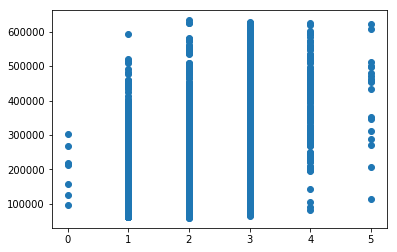

In [753]:
plt.scatter(data['Rooms'], data['Price']);

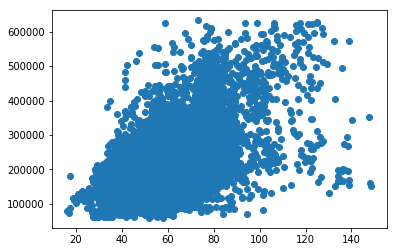

In [754]:
plt.scatter(data['Square'], data['Price']);

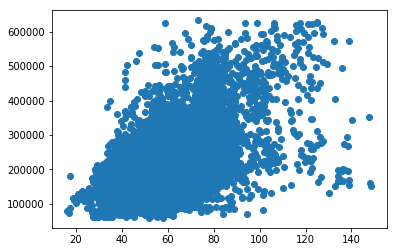

In [755]:
plt.scatter(data.loc[data['Square'] < 250, 'Square'], data.loc[data['Square'] < 250, 'Price']);

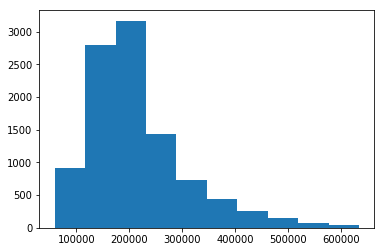

In [756]:
plt.hist(data['Price']);

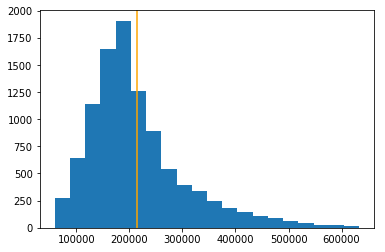

In [757]:
plt.hist(data['Price'], bins = 20)
plt.axvline(x=data['Price'].mean(), color='orange')

In [758]:
ls = np.linspace(data['Price'].min(), data['Price'].max(), 21)

In [759]:
ls

array([ 59174.77802758,  87877.7124547 , 116580.64688182, 145283.58130894,
       173986.51573605, 202689.45016317, 231392.38459029, 260095.31901741,
       288798.25344453, 317501.18787165, 346204.12229876, 374907.05672588,
       403609.991153  , 432312.92558012, 461015.86000724, 489718.79443436,
       518421.72886147, 547124.66328859, 575827.59771571, 604530.53214283,
       633233.46656995])

In [760]:
qty_flat = []
for i in range(20):
    qty_flat.append(data.loc[(ls[i] <= data['Price']) & (data['Price'] < ls[i + 1]), :].shape[0])
    qty_flat.append(data.loc[(ls[i] <= data['Price']) & (data['Price'] <= ls[i + 1]), :].shape[0])

In [761]:
qty_flat = np.array(qty_flat, dtype = np.float64)

In [762]:
qty_flat

array([ 274.,  274.,  643.,  643., 1143., 1143., 1649., 1649., 1906.,
       1906., 1262., 1262.,  889.,  889.,  545.,  545.,  396.,  396.,
        335.,  335.,  251.,  251.,  186.,  186.,  148.,  148.,  106.,
        106.,   87.,   87.,   67.,   67.,   43.,   43.,   29.,   29.,
         23.,   23.,   17.,   18.])

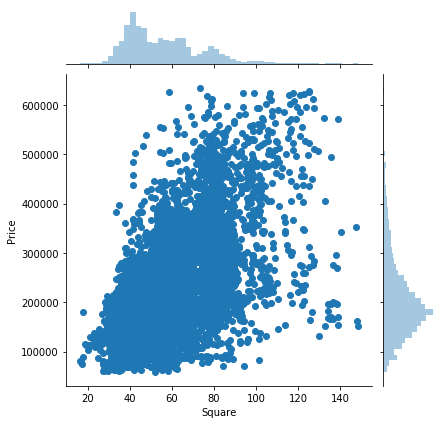

In [763]:
sns.jointplot(data['Square'], data['Price']);

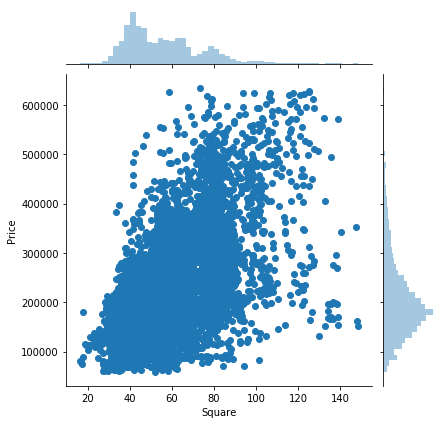

In [764]:
sns.jointplot(data.loc[data['Square'] < 250, 'Square'], data.loc[data['Square'] < 250, 'Price']);

In [765]:
?sns.jointplot

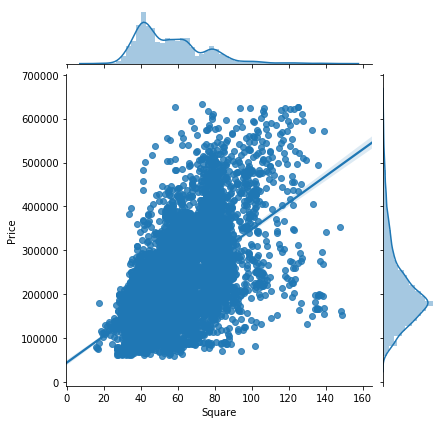

In [766]:
# с прямой регрессии (reg)
sns.jointplot(data.loc[data['Square'] < 250, 'Square'], data.loc[data['Square'] < 250, 'Price'], kind='reg');

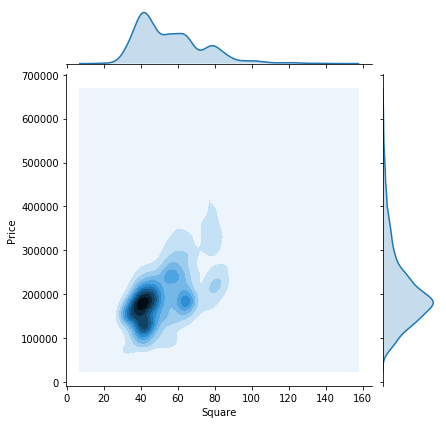

In [767]:
sns.jointplot(data.loc[data['Square'] < 250, 'Square'], data.loc[data['Square'] < 250, 'Price'], kind='kde');

In [768]:
?sns.boxplot

In [769]:
data['Price'].describe()

count     10000.000000
mean     214138.857399
std       92872.293865
min       59174.778028
25%      153872.633942
50%      192269.644879
75%      249135.462171
max      633233.466570
Name: Price, dtype: float64

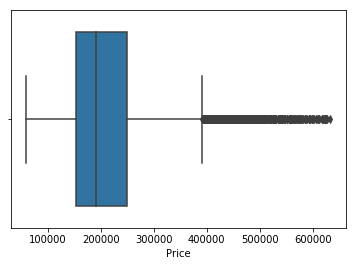

In [770]:
# График (Описательная статистика)
# Линия посредине это значение медиана
# Цена идет по горезонтале 
# И сравнивает что на графике и на таблице выше
sns.boxplot(data['Price'])

In [771]:
# IQR - интеквартильный размах (от 25% до 75%, от 1го квартиля до 3го)

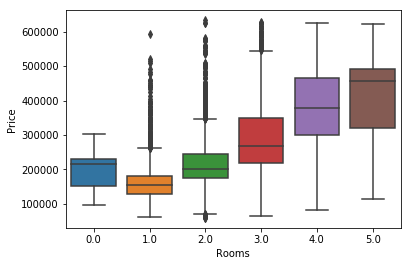

In [772]:
sns.boxplot(x=data['Rooms'], y = data['Price']);

#### Категориальные данные get_dummies

In [773]:
data.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2          int64
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
mean_square      float64
dtype: object

In [774]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,B,33,7976,5,0,11,B,184966.930730,56.790526
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,B,46,10309,1,1,16,B,300009.450063,76.903234
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,B,34,7759,0,1,3,B,220925.908524,56.790526
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,B,23,5735,3,0,5,B,175616.227217,56.790526
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,B,35,5776,1,2,4,B,150226.531644,41.323462


In [775]:
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,mean_square
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,B,33,7976,5,0,11,B,184966.930730,56.790526
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,B,46,10309,1,1,16,B,300009.450063,76.903234
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,B,34,7759,0,1,3,B,220925.908524,56.790526
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,B,23,5735,3,0,5,B,175616.227217,56.790526
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,B,35,5776,1,2,4,B,150226.531644,41.323462


In [776]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price', 'mean_square'],
      dtype='object')

In [777]:
data['DistrictId'].unique()

array([ 35,  41,  53,  58,  99,  59, 154,  74,   1,  23,  28,  31,  13,
        57,  27,  85,  34,  19,   0,  48,  54, 150,  11,  50,  61,  44,
        90, 200,  43, 177, 101,  38,  21, 103,  98, 170,  94,   5,  88,
        47,   6,  52,  62,  77,  79,   9, 156,  69, 108,  96, 169,  18,
       148, 128,  10, 144, 120,  39,   7,  84, 123, 159,  70, 129,   3,
        95,  78,  45,  15, 121,  49,  25,   2, 127,  56, 109,  46,  17,
       119,  80,  86,  83, 137,  91,  92, 118, 187,  36, 106, 161,  22,
        63, 167, 113,  66,  29,  37,  20,   8, 181,  40,  93,  30,  81,
       107, 130, 100,  12, 125,  67,  26,  89,  24, 111, 138,  64, 124,
       183,  55, 157, 151,  33,  87, 126, 155, 164, 105, 110, 132,  71,
        73, 189,  75, 122, 163, 141,  76, 115, 139, 143, 201, 165, 190,
       193, 174,  60, 114, 172, 134, 117, 149, 153, 131, 145,  82, 160,
        42,  32, 133, 208, 171, 176, 173, 147,  97, 142, 195, 180, 196,
       112,  72, 175,   4, 186, 146, 191, 168, 192,  14, 199, 13

In [778]:
data['DistrictId'].nunique()

205

In [779]:
'''# приводим к строковому типу (не применяем)
data['DistrictId'] = data['DistrictId'].astype(str)

data['DistrictId'].dtype
'''

"# приводим к строковому типу (не применяем)\ndata['DistrictId'] = data['DistrictId'].astype(str)\n\ndata['DistrictId'].dtype\n"

In [780]:
# переводим выражения в числа
data = pd.get_dummies(data)

In [781]:
data_stat1 = data.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price': "mean_price"})

In [782]:
data = pd.merge(data, data_stat1, on=['DistrictId', 'Rooms'], how='left')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,mean_square,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B,mean_price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,1,33,7976,5,0,11,184966.930730,56.790526,0,1,0,1,213160.076297
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,1,46,10309,1,1,16,300009.450063,76.903234,0,1,0,1,303643.563728
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,1,34,7759,0,1,3,220925.908524,56.790526,0,1,0,1,259938.729121
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,1,23,5735,3,0,5,175616.227217,56.790526,0,1,0,1,172368.882269
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,1,35,5776,1,2,4,150226.531644,41.323462,0,1,0,1,155748.415754


In [783]:
data.shape

(10000, 23)

In [784]:
data.loc[:, ['Price', 'mean_price']].corr()

,Price,mean_price
Price,1.000000,0.802981
mean_price,0.802981,1.000000


### Обучение с учителем

#### train_tast_split

In [785]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 23 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       10000 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null int64
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Price            10000 non-null float64
mean_square      10000 non-null float64
Ecology_3_A      10000 non-null uint8
Ecology_3_B      10000 non-null uint8
Shops_2_A        10000 non-null uint8
Shops_2_B        10000 non-null uint8
mean_price       10000 non-null float64


In [786]:
# random_state используется в различных алгоритмах sklearn, чтобы разбить связь между разными 
# предикторами (деревьями) с одинаковым значением показателя
train, valid = train_test_split(data, test_size=0.3, random_state=42)

In [787]:
train.shape, valid.shape

((7000, 23), (3000, 23))

#### Подготовка данных (prepare data)

In [788]:
# ставим среднее значение стоимости квартир для района и количества комнат
# быстрая поправка комнат
# sourse_df - источник данных
def prepare_rooms(df, source_df):
    df.loc[df['Rooms'] > 5, 'Rooms'] = source_df['Rooms'].median()
    return df

In [789]:
# подготовка параметра life_square
def prepare_life_square(df, source_df):
    df['LifeSquare'] = df['LifeSquare'].fillna(source_df['LifeSquare'].mean())
    return df

In [790]:
train = prepare_rooms(train, train)
train = prepare_life_square(train, train)

In [791]:
# df для хранения усредненных значений
stats1 = train.groupby(['DistrictId', 'Rooms'], as_index=False)[['Price']].mean().rename(columns={'Price':'MeanPrice'})
# stats1

,DistrictId,Rooms,MeanPrice
0,0,1.0,145789.889600
1,0,2.0,198451.332808
2,0,3.0,291670.749162
3,1,1.0,146748.710984
4,1,2.0,198775.648383
5,1,3.0,247145.388423
6,1,4.0,277290.705058
7,2,1.0,184560.609064
8,2,2.0,247244.824542
9,2,3.0,338384.676484


In [792]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Price',
       'mean_square', 'Ecology_3_A', 'Ecology_3_B', 'Shops_2_A', 'Shops_2_B',
       'mean_price'],
      dtype='object')

In [793]:
def join_stats1(df, stats1, source_df, mode='train'):
    df = pd.merge(df, stats1, on=['DistrictId', 'Rooms'], how='left')
    if mode=='test':
        df['MeanPrice'] = df['MeanPrice'].fillna(source_df['MeanPrice'].mean())
    return df

In [794]:
train = join_stats1(train, stats1, train)

In [795]:
valid = prepare_rooms(valid, train)
valid = prepare_life_square(valid, train)

In [796]:
valid = join_stats1(valid, stats1, train, mode='test')

### Model

#### Модель Линейная регрессия

In [797]:
from sklearn.linear_model import LinearRegression as LR

In [798]:
model = LR()

In [799]:
feats = ['Square', 'Rooms', 'MeanPrice', 'LifeSquare']

In [800]:
model.fit(train.loc[:, feats], train['Price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [801]:
# Создаем массив pred_trai nпременяем на трейн данных (на тех на которых учились)
pred_train = model.predict(train.loc[:, feats])

In [802]:
# пременяем на валид данных
pred_valid = model.predict(valid.loc[:, feats])

In [803]:
pred_train.shape, pred_valid.shape

((7000,), (3000,))

#### Оценка модели Evaluation

In [804]:
# R2 and MSE
from sklearn.metrics import r2_score as R2, mean_squared_error as MSE

In [805]:
R2(train['Price'], pred_train), MSE(train['Price'], pred_train)

(0.7245355181831783, 2378301016.4320674)

In [806]:
R2(valid['Price'], pred_valid), MSE(valid['Price'], pred_valid)

(0.5642356927411873, 3748337808.9855533)

#### Test

In [807]:
test = pd.read_csv('data/test.csv')

In [808]:
test.shape

(5000, 19)

In [809]:
test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [810]:
# подготавлеваем данные из файла test
test = prepare_rooms(test, train)
test = prepare_life_square(test, train)
test = join_stats1(test, stats1, train, mode='test')

In [811]:
# создаем колонку price, в которую запишим результат
test['Price'] = model.predict(test.loc[:, feats])

In [812]:
test['Price'].describe()

count      5000.000000
mean     215838.964351
std       76208.346092
min       34385.203103
25%      164627.136516
50%      198445.162384
75%      249654.818197
max      733241.787235
Name: Price, dtype: float64

In [813]:
# записываем данные
test.loc[:, ['Id', 'Price']].to_csv('ASatyukova_predictions_v1.csv', index=None)

In [814]:
result = pd.read_csv('ASatyukova_predictions_v1.csv')

In [815]:
result.head()

,Id,Price
0,725,156751.462383
1,15856,268050.037507
2,5480,154019.313111
3,15664,230514.689456
4,14275,134389.015237


In [816]:
result.shape

(5000, 2)

In [817]:
result['Price'].describe()

count      5000.000000
mean     215838.964351
std       76208.346092
min       34385.203103
25%      164627.136516
50%      198445.162384
75%      249654.818197
max      733241.787235
Name: Price, dtype: float64

#### Модель Лес

In [835]:
from sklearn.ensemble import RandomForestRegressor as RF

In [836]:
# ?RF

In [837]:
# 100 деревьев (по умолчанию 10), глубина 12 
model_RF = RF(n_estimators=100, max_depth=12, min_samples_leaf=2)

In [838]:
feats = ['Square', 'Rooms', 'MeanPrice', 'LifeSquare']

In [839]:
model_RF.fit(train.loc[:, feats], train['Price'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [840]:
# Создаем массив pred_trai nпременяем на трейн данных (на тех на которых учились)
pred_train_RF = model_RF.predict(train.loc[:, feats])

In [841]:
# пременяем на валид данных
pred_valid_RF = model_RF.predict(valid.loc[:, feats])

In [842]:
pred_train_RF.shape, pred_valid_RF.shape

((7000,), (3000,))

#### Оценка модели Evaluation

In [843]:
R2(train['Price'], pred_train_RF), MSE(train['Price'], pred_train_RF)

(0.8876207635088111, 970258127.6906121)

In [844]:
R2(valid['Price'], pred_valid_RF), MSE(valid['Price'], pred_valid_RF)

(0.6204959678653595, 3264400706.10894)

#### Test

In [845]:
test = pd.read_csv('data/test.csv')

In [846]:
# подготавлеваем данные из файла test
test = prepare_rooms(test, train)
test = prepare_life_square(test, train)
test = join_stats1(test, stats1, train, mode='test')

In [847]:
# создаем колонку price, в которую запишим результат
test['Price'] = model_RF.predict(test.loc[:, feats])

In [848]:
test['Price'].describe()

count      5000.000000
mean     213040.121059
std       77561.777405
min       68206.311579
25%      164235.854601
50%      195611.201950
75%      247075.033485
max      584834.107497
Name: Price, dtype: float64

In [849]:
# записываем данные
test.loc[:, ['Id', 'Price']].to_csv('ASatyukova_predictions_v2.csv', index=None)

In [850]:
result_RF = pd.read_csv('ASatyukova_predictions_v2.csv')

In [851]:
result_RF.head()

,Id,Price
0,725,175705.986631
1,15856,276794.116634
2,5480,185882.360585
3,15664,187752.625682
4,14275,131507.107998


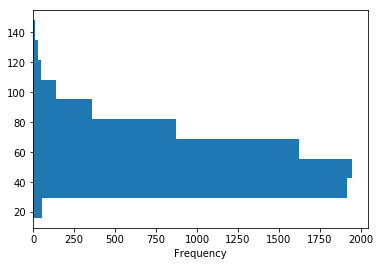

In [853]:
train['Square'].plot(kind='hist', orientation='horizontal')